In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.regularizers import l2, l1
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# kernel_regularizer = None
# bias_regularizer = None
kernel_regularizer = regularizers.l2(1e-5)
bias_regularizer = regularizers.l2(1e-5)

mlp_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = 'relu',
                          kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation = 'softmax', kernel_regularizer=kernel_regularizer,
                          bias_regularizer=bias_regularizer)
])

In [4]:
mlp_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [5]:
history = mlp_model.fit(X_train, y_train, batch_size=128, epochs=100, validation_data=[X_test, y_test], 
        callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=False)])

Epoch 1/100
469/469 [==============================] - 2s 3ms/step - loss: 0.5321 - accuracy: 0.8152 - val_loss: 0.4911 - val_accuracy: 0.8329
Epoch 2/100
469/469 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8574 - val_loss: 0.4157 - val_accuracy: 0.8527
Epoch 3/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3685 - accuracy: 0.8672 - val_loss: 0.4136 - val_accuracy: 0.8529
Epoch 4/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3494 - accuracy: 0.8737 - val_loss: 0.3927 - val_accuracy: 0.8568
Epoch 5/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3309 - accuracy: 0.8813 - val_loss: 0.3862 - val_accuracy: 0.8600
Epoch 6/100
469/469 [==============================] - 1s 3ms/step - loss: 0.3208 - accuracy: 0.8838 - val_loss: 0.3779 - val_accuracy: 0.8684
Epoch 7/100
469/469 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.8840 - val_loss: 0.3591 - val_accuracy: 0.8710

In [38]:
input_shape = X_train.shape[1:] if len(X_train.shape) == 4 else (*X_train.shape[1:], 1)
classes_cnt = len(np.unique(y_train))
print(input_shape, X_train.shape, classes_cnt)
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=input_shape, filters=4, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(Conv2D(filters=4, kernel_size=(2, 2), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.4))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(classes_cnt, activation='sigmoid'))

(28, 28, 1) (60000, 28, 28) 10


In [39]:
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [40]:
history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=5, validation_data=[X_test, y_test])

Epoch 1/5
469/469 [==============================] - 12s 25ms/step - loss: 2.4669 - accuracy: 0.6024 - val_loss: 0.6244 - val_accuracy: 0.7738
Epoch 2/5
469/469 [==============================] - 16s 33ms/step - loss: 0.6255 - accuracy: 0.7772 - val_loss: 0.4843 - val_accuracy: 0.8227
Epoch 3/5
469/469 [==============================] - 18s 38ms/step - loss: 0.5169 - accuracy: 0.8153 - val_loss: 0.4289 - val_accuracy: 0.8430
Epoch 4/5
469/469 [==============================] - 11s 24ms/step - loss: 0.4607 - accuracy: 0.8329 - val_loss: 0.3979 - val_accuracy: 0.8576
Epoch 5/5
469/469 [==============================] - 12s 25ms/step - loss: 0.4244 - accuracy: 0.8470 - val_loss: 0.3833 - val_accuracy: 0.8610


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [11]:
m_model = tf.keras.applications.MobileNetV2(input_shape=X_train.shape[1:], include_top=False, classes=10, weights='imagenet')

In [12]:
m_model.add(Flatten())
m_model.add(Dense(128), activation='relu')
m_model.add(Dense(10), activation='sigmoid')

AttributeError: 'Functional' object has no attribute 'add'

In [7]:
xd = m_model.predict(X_test[:2])

In [10]:
X_test[:2].shape

(2, 32, 32, 3)

In [8]:
xd.shape

(2, 1, 1, 1280)

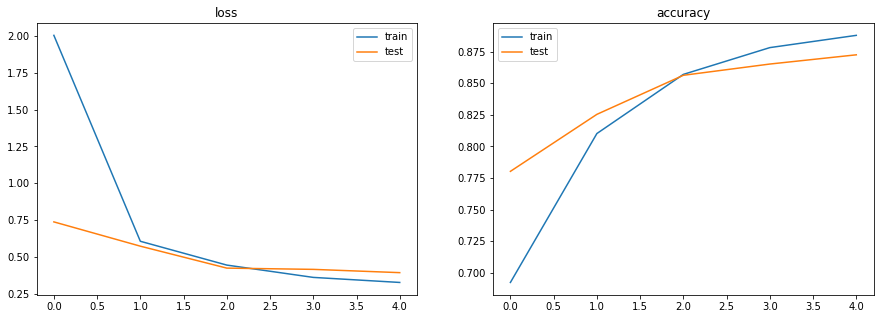

In [32]:
_, axs = plt.subplots(1, 2, figsize=(15, 5))
for idx, metric in enumerate(('loss', 'accuracy')):
    axs[idx].plot(history.history[metric], label='train')
    axs[idx].plot(history.history['val_'+metric], label='test')
    axs[idx].legend()
    axs[idx].set_title(metric)
plt.show()

In [33]:
mlp_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [34]:
cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_13 (Dense)            (None, 64)                802880    
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 803,850
Trainable params: 803,850
Non-trainable params: 0
________________________________________________